In [3]:
#! Example potential energy surface scan and CP-correction for Ne2
# Ignore this block -- it's for the documentation build
try:
    import os, sys
    sys.path.insert(1, os.path.abspath('/home/runner/work/psi4/psi4/code/objdir/stage//usr/local/psi4/lib/'))
except ImportError:
    pass

# This is the important part
import psi4




In [4]:
psi4.set_output_file('Ar.dat', False)


PosixPath('Ar.dat')

In [5]:
# Import Psi4 library
import psi4
# Define the molecular geometry for an Argon dimer
ar2_geometry = """
Ar
--
Ar 1 {0}
"""
# List of distances (in Ångstroms) between the two Argon atoms
Rvals = [3.5, 4.0, 5.0, 6.0]
# Set Psi4 options for the calculation
psi4.set_options({'freeze_core': True})
# Initialize a blank dictionary to store counterpoise-corrected energies
ecp = {}
# Loop over each distance and calculate the interaction energy with counterpoise correction
for R in Rvals:
    # Set up the Argon dimer geometry with the current distance
    ar2 = psi4.geometry(ar2_geometry.format(R))
    # Calculate the counterpoise-corrected interaction energy
    ecp[R] = psi4.energy('ccsd(t)/aug-cc-pvdz', bsse_type='cp', molecule=ar2)
# Print the results to the screen
print("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies for Argon Dimer\n\n")
print("          R [Ang]                 E_int [kcal/mol]       ")
print("---------------------------------------------------------")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol  # Convert from Hartree to kcal/mol
    print("            {:3.1f}                        {:1.6f}".format(R, e))
# Optionally, print the results to an output file
psi4.core.print_out("CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies for Argon Dimer\n\n")
psi4.core.print_out("          R [Ang]                 E_int [kcal/mol]       \n")
psi4.core.print_out("---------------------------------------------------------\n")
for R in Rvals:
    e = ecp[R] * psi4.constants.hartree2kcalmol
    psi4.core.print_out("            {:3.1f}                        {:1.6f}\n".format(R, e))






CP-corrected CCSD(T)/aug-cc-pVDZ Interaction Energies for Argon Dimer


          R [Ang]                 E_int [kcal/mol]       
---------------------------------------------------------
            3.5                        0.168852
            4.0                        -0.123122
            5.0                        -0.055927
            6.0                        -0.018843


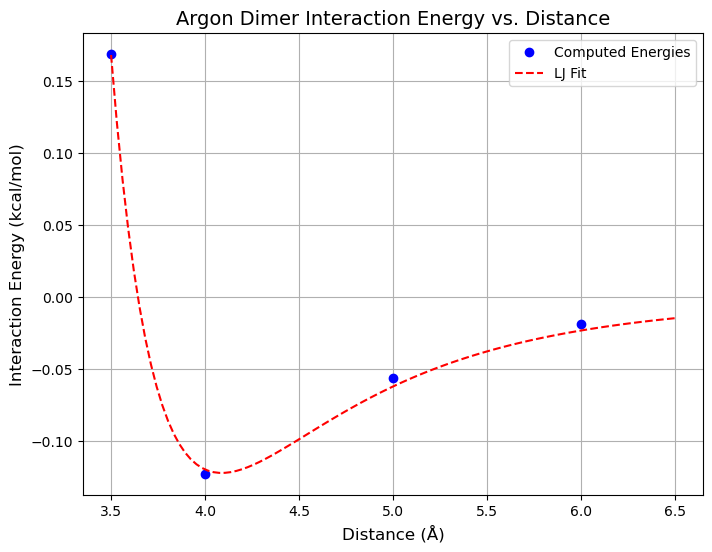

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
# Distances (R) and corresponding interaction energies (E) in kcal/mol
Rvals = np.array([3.5, 4.0, 5.0, 6.0])
Energies = np.array([ecp[R] * psi4.constants.hartree2kcalmol for R in Rvals])
# Define the Lennard-Jones potential function
def lj(r, sigma, eps):
    return 4 * eps * ((sigma / r)**12 - (sigma / r)**6)
# Fit the interaction energy data to the Lennard-Jones potential
params, covariance = curve_fit(lj, Rvals, Energies, p0=[3.8, -0.1])  # Initial guesses for sigma and eps
sigma_fit, eps_fit = params
# Generate fitted energy values over a range of distances for smooth plotting
R_fit = np.linspace(3.5, 6.5, 100)
E_fit = lj(R_fit, sigma_fit, eps_fit)
# Plot the computed energies and the fitted Lennard-Jones curve
plt.figure(figsize=(8, 6))
plt.plot(Rvals, Energies, 'o', label='Computed Energies', color='blue')  # Computed energies as dots
plt.plot(R_fit, E_fit, '--', label='LJ Fit', color='red')  # LJ fit as dashed line
# Add labels and legend
plt.xlabel('Distance (Å)', fontsize=12)
plt.ylabel('Interaction Energy (kcal/mol)', fontsize=12)
plt.title('Argon Dimer Interaction Energy vs. Distance', fontsize=14)
plt.legend()
plt.grid(True)

# Display the plot
plt.show()